# What is this for?
This notebook helps us to test our LSTM Models. That way we will create default setup of model parameters. But those will still be changeable within the streamlit application. So this is kind of a helper notebook.

In [149]:
# Import Libraries
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import yfinance as yf 
import datetime
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import sys



In [48]:
# create test dataframe with Paypal stockset (PYPL)
pypl = yf.download("PYPL", start="2019-12-01", end="2021-12-31", progress=False)
pypl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,107.959999,108.489998,104.650002,106.209999,106.209999,7182600
2019-12-03,105.000000,106.129997,104.510002,105.589996,105.589996,8947500
2019-12-04,106.290001,106.290001,104.654999,105.000000,105.000000,7848700
2019-12-05,105.449997,105.500000,104.110001,104.589996,104.589996,5635800
2019-12-06,104.790001,105.344002,104.160004,104.339996,104.339996,7018000


In [51]:
# create training and test set out of the Close Column
# We use 0.7 as trainsize and 0.3 as testsize
trainsize = round(.7 * len(pypl))
training_set = pypl.iloc[:trainsize, 3:4].values
test_set = pypl.iloc[trainsize:, 3:4].values
print(training_set.shape, test_set.shape)

(355, 1) (152, 1)


In [116]:
# Lets scale the data by using the MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

# Creating batches of arrays as traini 
X_train = []
y_train = []
for i in range(50, trainsize):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [117]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 6s 52ms/step - loss: 0.0963
Epoch 2/100
10/10 [==============================] - 0s 47ms/step - loss: 0.0226
Epoch 3/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0165
Epoch 4/100
10/10 [==============================] - 1s 58ms/step - loss: 0.0114
Epoch 5/100
10/10 [==============================] - 0s 50ms/step - loss: 0.0110
Epoch 6/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0085
Epoch 7/100
10/10 [==============================] - 1s 51ms/step - loss: 0.0079
Epoch 8/100
10/10 [==============================] - 0s 48ms/step - loss: 0.0083
Epoch 9/100
10/10 [==============================] - 1s 53ms/step - loss: 0.0089
Epoch 10/100
10/10 [==============================] - 0s 50ms/step - loss: 0.0083
Epoch 11/100
10/10 [==============================] - 0s 49ms/step - loss: 0.0079
Epoch 12/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0077
Epoch 13/100
10/10 [=====

In [118]:
# Getting the predicted stock price of 2017
dataset_train = pypl.iloc[:trainsize, 3:4]
dataset_test = pypl.iloc[trainsize:, 3:4]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 50:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(50, len(inputs)):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [119]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

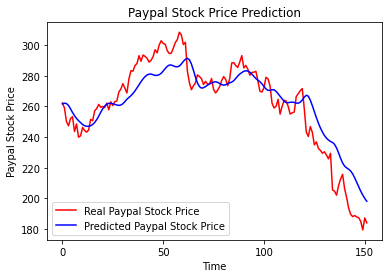

In [120]:
# Visualising the results
plt.plot(dataset_test.values, color = "red", label = "Real Paypal Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Paypal Stock Price")
plt.xticks(np.arange(0,len(predicted_stock_price),50))
plt.title('Paypal Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Paypal Stock Price')
plt.legend()
plt.show()

In [128]:
# evaluation 
mae = mean_absolute_error(dataset_test.values, predicted_stock_price)

In [129]:
mae

9.993547941509046

In [130]:
print(dataset_test.mean())

Close    261.493422
dtype: float64


In [126]:
prediction_frame = pd.DataFrame()
prediction_frame["truth"] = dataset_test
prediction_frame["preds"] = predicted_stock_price

In [162]:
dataset_test

,Close
Date,
2021-04-30,262.290009
2021-05-03,259.089996
2021-05-04,250.160004
2021-05-05,247.399994
2021-05-06,252.020004
...,...
2021-11-29,187.240005
2021-11-30,184.889999
2021-12-01,179.320007


In [127]:
prediction_frame

,truth,preds
Date,,
2021-04-30,262.290009,261.698578
2021-05-03,259.089996,262.136597
2021-05-04,250.160004,261.926880
2021-05-05,247.399994,260.696503
2021-05-06,252.020004,258.527161
...,...,...
2021-11-29,187.240005,207.403976
2021-11-30,184.889999,204.608307
2021-12-01,179.320007,202.152481


<AxesSubplot:xlabel='Date'>

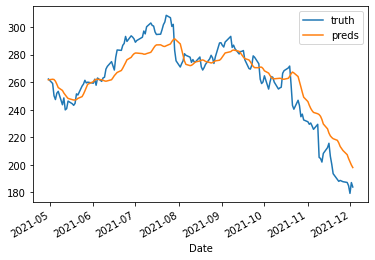

In [156]:
prediction_frame.plot()

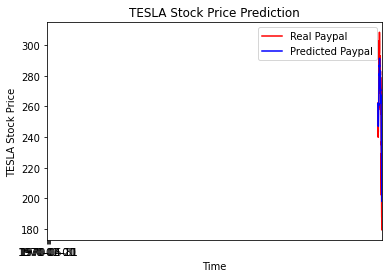

In [155]:
plt.plot(prediction_frame.index,prediction_frame.truth, color = "red", label = "Real Paypal")
plt.plot(prediction_frame.index,prediction_frame.preds, color = "blue", label = "Predicted Paypal")
plt.xticks(np.arange(0,len(predicted_stock_price),50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# Looks not to bad 
Since the prediction above looks pretty good we will use the parameters as the default for our LSTM model class 

In [136]:
df_cols = pypl.columns 
try:
        df_cols[3] == "Close"
        print("hello")
except Exception as e: 
        print("no")
print("wow")


hello
wow


In [132]:
df_cols

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [141]:
df_cols = pypl.columns 
try:
    1 + 1 == 3
except Exception as e: 
        print(e)
print("wow")

wow


In [144]:
try:
    df_cols[2] == "Close"

False

In [147]:

if df_cols[2] == "Close":
    print("hello")
else break

SyntaxError: invalid syntax (584814027.py, line 3)

In [152]:

if df_cols[2] == "Close":
    print("wow")
else:
    sys.exit("aa! errors!")
    
print("hello")

SystemExit: aa! errors!

/Users/dennisweber/Desktop/projects/stock-market-pred-tool/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [170]:
training_set[i-60:i, 0]

array([168.        , 172.5       , 170.86999512, 168.3500061 ,
       174.22999573, 177.42999268, 177.21000671, 176.17999268,
       177.27999878, 181.57000732, 183.22999573, 178.3999939 ,
       171.50999451, 172.30000305, 172.05999756, 169.80999756,
       173.91999817, 178.82000732, 175.58000183, 178.41999817,
       173.86000061, 172.55999756, 177.97999573, 176.27000427,
       184.6000061 , 192.50999451, 196.07000732, 197.07000732,
       197.33000183, 202.91000366, 204.08999634, 198.63000488,
       193.32000732, 189.02999878, 191.32000732, 193.07000732,
       191.46000671, 196.28999329, 194.57000732, 192.44000244,
       198.17999268, 196.78999329, 198.88000488, 201.66999817,
       203.47999573, 204.33999634, 204.47999573, 204.13999939,
       208.92999268, 210.82000732, 204.99000549, 191.83999634,
       185.94999695, 194.6000061 , 190.08999634, 184.        ,
       186.96000671, 186.02000427, 180.91000366, 175.78999329])

In [171]:
training_set[i, 0]

176.07000732421875

In [159]:
type(X_train)

numpy.ndarray

In [172]:
prediction_frame

,truth,preds
Date,,
2021-04-30,262.290009,261.698578
2021-05-03,259.089996,262.136597
2021-05-04,250.160004,261.926880
2021-05-05,247.399994,260.696503
2021-05-06,252.020004,258.527161
...,...,...
2021-11-29,187.240005,207.403976
2021-11-30,184.889999,204.608307
2021-12-01,179.320007,202.152481


In [174]:
plot_df = prediction_frame.reset_index().melt("Date", var_name="name", value_name="Stock-Price")

In [175]:
plot_df

,Date,name,Stock-Price
0,2021-04-30,truth,262.290009
1,2021-05-03,truth,259.089996
2,2021-05-04,truth,250.160004
3,2021-05-05,truth,247.399994
4,2021-05-06,truth,252.020004
...,...,...,...
299,2021-11-29,preds,207.403976
300,2021-11-30,preds,204.608307
301,2021-12-01,preds,202.152481
302,2021-12-02,preds,199.902863
